# Figure 2a and 2b
H<sub>2</sub>O (a) and CO<sub>2</sub> (b) solubility as a function of pressure in a phonolite (silicic alkaline rock), rhyolite, a nephelinite (highly alkali-rich basalt), and an ocean island basalt (OIB) at temperatures typical for these lavas: 900, 1000, 1200, and 1200 °C, respectively.

## About this notebook
This notebook uses VESIcal to compute solubility curves, numpy for some math, pandas to handle dataframes, and matplotlib to plot. Pickle is used to "pickle" (save) computed values to memory and read them back in such that the computations do not need to be run each time the script is run (e.g., if it is desired to only update the plots). If new calculations are desired, simply delete the '.p' files that should live in the same folder as this notebook, and the code will recompute and save new pickle files.

If the MagmaSat model is desired (the default model in VESIcal), the ENKI thermoengine must also be installed on your machine to run this notebook. That is a bit cumbersome, so you may choose to only install VESIcal (without ENKI thermoengine, which is a separate install), which will allow you to use any model within VESIcal except for MagmaSat.

In [12]:
import VESIcal as v
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import pickle

## Import Data and Define Notebook Settings

- Mono Craters Rhyolite (samp_rhyolite) - 900 <sup>o</sup>C
- La Palma OIB sample samp_LL4_13 (samp_oib) - 1200 <sup>o</sup>C
- Nyiragongo Nephelenite (samp_nephelenite) - 1200 <sup>o</sup>C
- Erebus Phonolite (samp_phonolite) - 1000 <sup>o</sup>C

In [13]:
# Generic compositions
myfile = v.BatchFile('files/compositions.xlsx')

# Extract individual samples
samp_rhyolite = myfile.get_sample_composition("Mono Craters", asSampleClass=True)
samp_nephelenite = myfile.get_sample_composition("Nyiragongo", asSampleClass=True)
samp_phonolite = myfile.get_sample_composition("Erebus", asSampleClass=True)
samp_oib = myfile.get_sample_composition("LaPalma", asSampleClass=True)

# Set which model to use for each sample
rhyolite_model = "MagmaSat"
OIB_model = "MagmaSat"
nephelenite_model = "MagmaSat"
phonolite_model = "MagmaSat"

# Define plot colors for entire notebook
lc1 = '#B22221' # red
lc2 = '#0160C6' # blue
lc3 = '#FF8C03' # orange
lc4 = '#800080' #purple

## H<sub>2</sub>O

In [14]:
try:
    with open('pickle/rhyolite_H2O_vals_900.pickle', 'rb') as handle:
        rhyolite_H2O_vals_900 = pickle.load(handle)
except:
    pressures = np.arange(1, 5250, 250)
    rhyolite_H2O_vals_900 = []

    for press in pressures:
        # H2O diff temps
        rhyolite_H2O_900  = v.calculate_dissolved_volatiles(sample=samp_rhyolite, pressure=press, temperature=900, X_fluid=1, model=rhyolite_model).result
        rhyolite_H2O_vals_900.append(rhyolite_H2O_900['H2O_liq'])
    
    with open('pickle/rhyolite_H2O_vals_900.pickle', 'wb') as handle:
        pickle.dump(rhyolite_H2O_vals_900, handle)

try:    
    with open('pickle/oib_H2O_vals_1200.pickle', 'rb') as handle:
        oib_H2O_vals_1200 = pickle.load(handle)
except:
    pressures = np.arange(1, 5250, 250)
    oib_H2O_vals_1200 = []

    for press in pressures:
        # H2O diff temps
        oib_H2O_1200 = v.calculate_dissolved_volatiles(sample=samp_oib, pressure=press, temperature=1200, X_fluid=1, model=OIB_model).result
        oib_H2O_vals_1200.append(oib_H2O_1200['H2O_liq'])
    
    # Pickle H2O diff temps    
    with open('pickle/oib_H2O_vals_1200.pickle', 'wb') as handle:
        pickle.dump(oib_H2O_vals_1200, handle)

try:
    with open('pickle/nephelenite_H2O_vals_1200.pickle', 'rb') as handle:
        nephelenite_H2O_vals_1200 = pickle.load(handle)
except:
    pressures = np.arange(1, 5250, 250)
    nephelenite_H2O_vals_1200 = []

    for press in pressures:
        # H2O diff temps
        nephelenite_H2O_1200 = v.calculate_dissolved_volatiles(sample=samp_nephelenite, pressure=press, temperature=1200, X_fluid=1, model=nephelenite_model).result
        nephelenite_H2O_vals_1200.append(nephelenite_H2O_1200['H2O_liq'])
    
    # Pickle H2O diff temps    
    with open('pickle/nephelenite_H2O_vals_1200.pickle', 'wb') as handle:
        pickle.dump(nephelenite_H2O_vals_1200, handle)

try:
    with open('pickle/phonolite_H2O_vals_1000.pickle', 'rb') as handle:
        phonolite_H2O_vals_1000 = pickle.load(handle)
except:
    pressures = np.arange(1, 5250, 250)
    phonolite_H2O_vals_1000 = []

    for press in pressures:
        # H2O diff temps
        phonolite_H2O_1000 = v.calculate_dissolved_volatiles(sample=samp_phonolite, pressure=press, temperature=1000, X_fluid=1, model=phonolite_model).result
        phonolite_H2O_vals_1000.append(phonolite_H2O_1000['H2O_liq'])
    
    # Pickle H2O diff temps    
    with open('pickle/phonolite_H2O_vals_1000.pickle', 'wb') as handle:
        pickle.dump(phonolite_H2O_vals_1000, handle)
    

## CO<sub>2</sub>

In [15]:
try:
    with open('pickle/rhyolite_CO2_vals_900.pickle', 'rb') as handle:
        rhyolite_CO2_vals_900 = pickle.load(handle)
    
    with open('pickle/oib_CO2_vals_1200.pickle', 'rb') as handle:
        oib_CO2_vals_1200 = pickle.load(handle)
    
    with open('pickle/nephelenite_CO2_vals_1200.pickle', 'rb') as handle:
        nephelenite_CO2_vals_1200 = pickle.load(handle)
    
    with open('pickle/phonolite_CO2_vals_1000.pickle', 'rb') as handle:
        phonolite_CO2_vals_1000 = pickle.load(handle)

except:
    pressures = np.arange(1, 5250, 250)
    rhyolite_CO2_vals_900 = []    
    oib_CO2_vals_1200 = []
    nephelenite_CO2_vals_1200 = []
    phonolite_CO2_vals_1000 = []

    for press in pressures:
        # CO2 diff temps
        rhyolite_CO2_900  = v.calculate_dissolved_volatiles(sample=samp_rhyolite, pressure=press, temperature=900, X_fluid=0, model=rhyolite_model).result
        oib_CO2_1200 = v.calculate_dissolved_volatiles(sample=samp_oib, pressure=press, temperature=1200, X_fluid=0, model=OIB_model).result
        nephelenite_CO2_1200 = v.calculate_dissolved_volatiles(sample=samp_nephelenite, pressure=press, temperature=1200, X_fluid=0, model=nephelenite_model).result
        phonolite_CO2_1000 = v.calculate_dissolved_volatiles(sample=samp_phonolite, pressure=press, temperature=1000, X_fluid=0, model=phonolite_model).result

        rhyolite_CO2_vals_900.append(rhyolite_CO2_900['CO2_liq'])
        oib_CO2_vals_1200.append(oib_CO2_1200['CO2_liq'])
        nephelenite_CO2_vals_1200.append(nephelenite_CO2_1200['CO2_liq'])
        phonolite_CO2_vals_1000.append(phonolite_CO2_1000['CO2_liq'])
    
    # Pickle CO2 diff temps
    with open('pickle/rhyolite_CO2_vals_900.pickle', 'wb') as handle:
        pickle.dump(rhyolite_CO2_vals_900, handle)
    
    with open('pickle/oib_CO2_vals_1200.pickle', 'wb') as handle:
        pickle.dump(oib_CO2_vals_1200, handle)
    
    with open('pickle/nephelenite_CO2_vals_1200.pickle', 'wb') as handle:
        pickle.dump(nephelenite_CO2_vals_1200, handle)

    with open('pickle/phonolite_CO2_vals_1000.pickle', 'wb') as handle:
        pickle.dump(phonolite_CO2_vals_1000, handle)

## Plot Figure 2a
Pure H<sub>2</sub>O solubility at temperatures unique to each magma type.

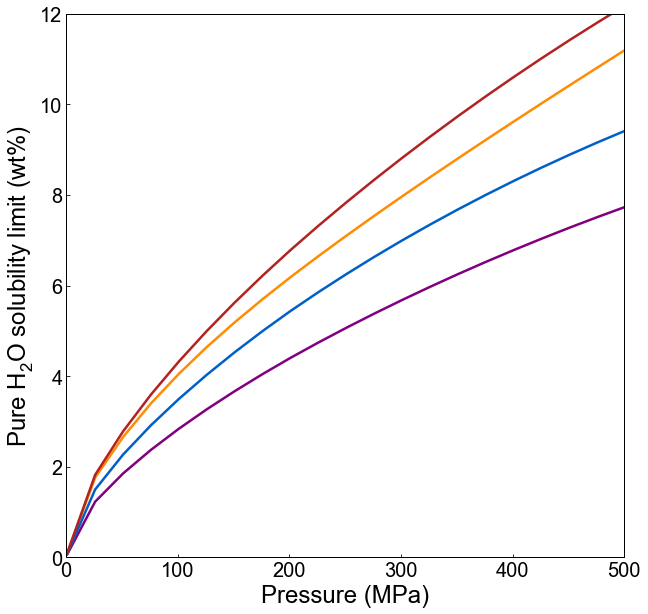

In [16]:
fig, ax = plt.subplots(figsize=(10,10))
pressures = np.arange(1, 525, 25)

ax.plot(pressures, rhyolite_H2O_vals_900, color=lc3, linewidth=2.5)
ax.plot(pressures, oib_H2O_vals_1200, color=lc4, linewidth=2.5)
ax.plot(pressures, nephelenite_H2O_vals_1200, color=lc2, linewidth=2.5)
ax.plot(pressures, phonolite_H2O_vals_1000, color=lc1, linewidth=2.5)

plt.ylabel("Pure " + r'H$_2O$' + " solubility limit (wt%)", fontsize=24, family='Arial')
plt.xlabel("Pressure (MPa)", fontsize=24, family='Arial')

# Plot settings
ax.set_xlim(left=0, right=500)
ax.set_ylim(bottom=0, top=12)
ax.tick_params(axis='x', labelsize=20, direction='in')
ax.tick_params(axis='y', labelsize=20, direction='in')

plt.xticks(fontname='Arial')
plt.yticks(fontname='Arial')

fig.savefig('Figure2a.png', dpi=400)   # save the figure to file

plt.show()

## Plot Figure 2b
Pure CO<sub>2</sub> solubility with temperatures unique to each magma type.

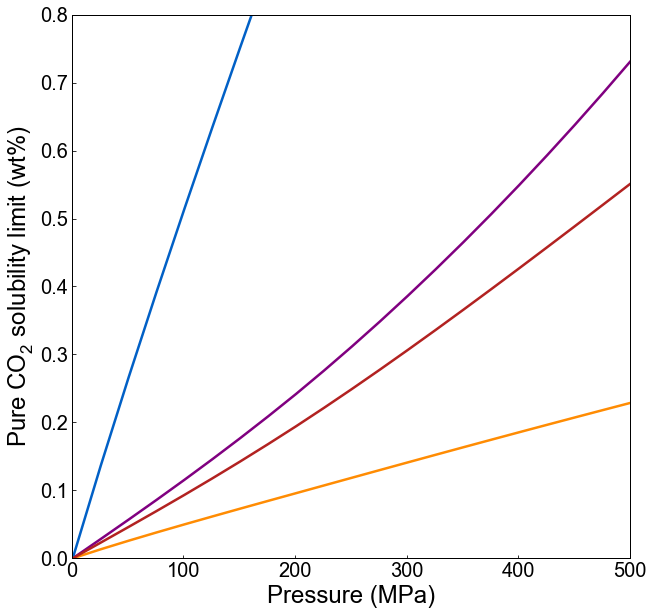

In [17]:
fig, ax = plt.subplots(figsize=(10,10))
pressures = np.arange(1, 525, 25)

# ax.plot(pressures, samp1_CO2_vals_1200, label="MORB1")
ax.plot(pressures, rhyolite_CO2_vals_900, color=lc3, linewidth=2.5)
ax.plot(pressures, oib_CO2_vals_1200, color=lc4, linewidth=2.5)
ax.plot(pressures, nephelenite_CO2_vals_1200, color=lc2, linewidth=2.5)
ax.plot(pressures, phonolite_CO2_vals_1000, color=lc1, linewidth=2.5)

plt.ylabel("Pure " + r'CO$_2$' + " solubility limit (wt%)", fontsize=24, family='Arial')
plt.xlabel("Pressure (MPa)", fontsize=24, family='Arial')

# Plot settings
ax.set_xlim(left=0, right=500)
ax.set_ylim(bottom=0, top=0.8)
ax.tick_params(axis='x', labelsize=20, direction='in')
ax.tick_params(axis='y', labelsize=20, direction='in')

plt.xticks(fontname='Arial')
plt.yticks(fontname='Arial')

plt.show()

fig.savefig('Figure2b.png', dpi=400)   # save the figure to file